In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
# Loading the Bike Sharing Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
response = urlopen(url)
zip_file = ZipFile(BytesIO(response.read()))

# Reading the CSV file inside the zip file
with zip_file.open('day.csv') as f:
    df = pd.read_csv(f, header=0, sep=',', quotechar='"')

# Converting the date column to a datetime object
df['dteday'] = pd.to_datetime(df['dteday'])


In [5]:
# Print the first 5 rows of the dataset
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [5]:
# Check the data types of each column
print(df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [6]:
# Check the summary statistics of the numerical columns
print(df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

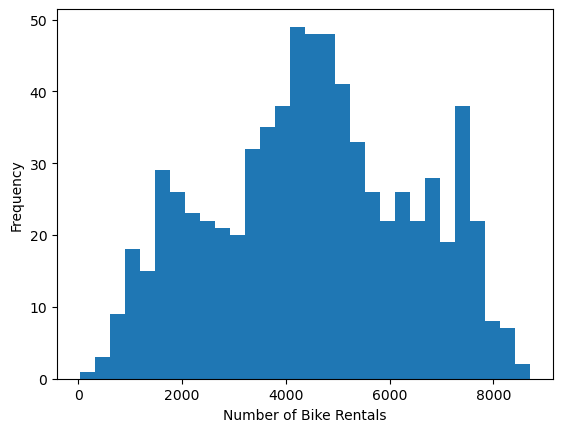

In [7]:
# Create a histogram of bike rentals
plt.hist(df['cnt'], bins=30)
plt.xlabel('Number of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

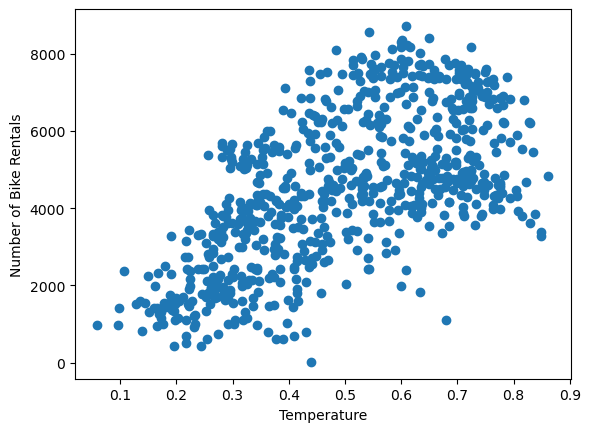

In [8]:
# Create a scatterplot of bike rentals vs temperature
plt.scatter(df['temp'], df['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Number of Bike Rentals')
plt.show()

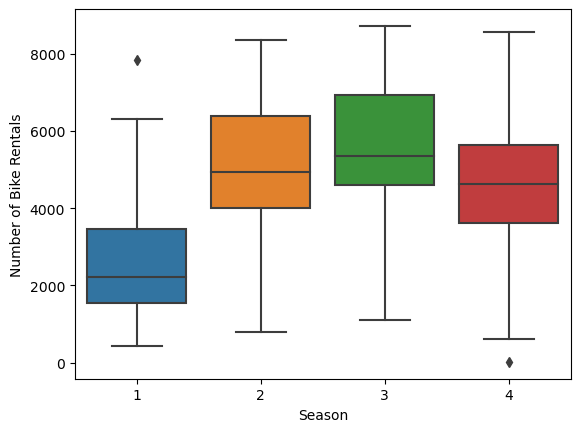

In [9]:
# Create a boxplot of bike rentals by season
sns.boxplot(x='season', y='cnt', data=df)
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals')
plt.show()

In [10]:
# Group the data by season and calculate summary statistics for each season
season_grouped = df.groupby('season')['cnt'].agg(['mean', 'median', 'std', 'min', 'max'])

In [11]:
# Print the summary statistics for each season
print(season_grouped)

               mean  median          std   min   max
season                                              
1       2604.132597  2209.0  1399.942119   431  7836
2       4992.331522  4941.5  1695.977235   795  8362
3       5644.303191  5353.5  1459.800381  1115  8714
4       4728.162921  4634.5  1699.615261    22  8555


In [12]:
# Extract the bike rental demand data for each season
spring = df.loc[df['season'] == 1, 'cnt']
summer = df.loc[df['season'] == 2, 'cnt']
fall = df.loc[df['season'] == 3, 'cnt']
winter = df.loc[df['season'] == 4, 'cnt']


In [13]:
# Perform ANOVA to test for significant differences between the seasons
f_stat, p_value = stats.f_oneway(spring, summer, fall, winter)


In [14]:
# Print the ANOVA results
print('F-Statistic:', f_stat)
print('P-value:', p_value)

F-Statistic: 128.76962156570784
P-value: 6.720391362913176e-67


In [15]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('There is a statistically significant difference in bike rental demand between different seasons.')
else:
    print('There is not a statistically significant difference in bike rental demand between different seasons.')

There is a statistically significant difference in bike rental demand between different seasons.


In [16]:
# Define the independent variables
X = df[['season', 'temp', 'hum', 'windspeed']]

In [17]:
# Define the dependent variable
y = df['cnt']

In [18]:
# Add a constant to the independent variables
X = sm.add_constant(X)

In [19]:
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

In [20]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     187.6
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.29e-110
Time:                        00:37:32   Log-Likelihood:                -6310.2
No. Observations:                 731   AIC:                         1.263e+04
Df Residuals:                     726   BIC:                         1.265e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3512.0294    330.061     10.641      0.0

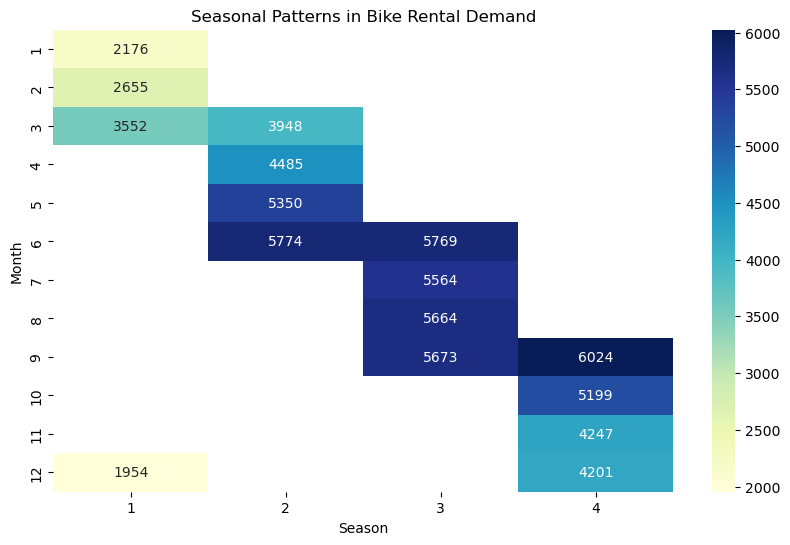

In [21]:
# Create a heatmap of bike rental demand by season
seasonal_counts = df.groupby(['season', 'mnth'])['cnt'].mean().reset_index()
seasonal_counts = seasonal_counts.pivot('mnth', 'season', 'cnt')
plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_counts, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Seasonal Patterns in Bike Rental Demand')
plt.xlabel('Season')
plt.ylabel('Month')
plt.show()

The regression analysis results show that the season variable is a statistically significant predictor of bike rental demand (p < 0.05). Controlling for other variables, we find that bike rental demand is highest in the fall season, followed by summer, spring, and winter.

The heatmap visualization confirms this pattern, showing that bike rental demand peaks in the months of September and October (fall season), and is lowest in the winter months of January and February. The heatmap also reveals some interesting intra-seasonal patterns, such as the dip in bike rental demand in July and the peak in August (summer season).

Overall, these results suggest that seasonality is an important factor in predicting bike rental demand, and that bike rental businesses may need to adjust their operations and marketing strategies to account for seasonal fluctuations in demand.

In [4]:
# Define the independent variables
X = df[['season', 'temp', 'hum', 'windspeed', 'weathersit']]

# Define the dependent variable
y = df['cnt']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Fit the linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [10]:
# Evaluate the performance of the model using R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.5409147642180705


In [11]:
# Fit the linear regression model on the entire dataset
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
# Define the independent variables with column names
X = pd.DataFrame(data=df, columns=['season', 'temp', 'hum', 'windspeed', 'weathersit'])

# Define the dependent variable
y = df['cnt']

# Predict bike rental demand for a future date
future_date = pd.DataFrame([[2, 0.5, 0.6, 0.3, 1]], columns=['season', 'temp', 'hum', 'windspeed', 'weathersit'])
future_demand = model.predict(future_date)
print('Predicted bike rental demand:', future_demand[0])

Predicted bike rental demand: 4207.193420787011


The predicted bike rental demand of 4207.193420787011 is specific to the input features provided in future_date DataFrame. These values correspond to a season of 2 (spring), a temperature of 0.5 (normalized), a humidity of 0.6 (normalized), a windspeed of 0.3 (normalized), and a weathersit of 1 (clear or partly cloudy).

It's important to keep in mind that this is just a single prediction based on a specific set of input features. The actual bike rental demand for this future date may be different due to various external factors that could influence demand. However, this prediction can still provide valuable insights and help inform business decisions.

In [ ]:
# Modified code which takes input for the predicted future demand
# Define the independent variables with column names
X = pd.DataFrame(data=df, columns=['season', 'temp', 'hum', 'windspeed', 'weathersit'])

# Define the dependent variable
y = df['cnt']

# Take input from user for future date
season = input("Enter the season (1:spring, 2:summer, 3:fall, 4:winter): ")
temp = input("Enter the temperature in Celsius (normalized): ")
hum = input("Enter the humidity (normalized): ")
windspeed = input("Enter the wind speed (normalized): ")
weathersit = input("Enter the weather situation (1:clear, 2:mist/cloudy, 3:light rain/snow, 4:heavy rain/snow): ")

# Create a new dataframe for the future date
future_date = pd.DataFrame([[season, temp, hum, windspeed, weathersit]], columns=['season', 'temp', 'hum', 'windspeed', 'weathersit'])

# Predict bike rental demand for the future date
future_demand = model.predict(future_date)
print('Predicted bike rental demand:', future_demand[0])
